# Validating Structure Function Calculation for 2D
Replicating results from problem 1: https://github.com/ShubhadeepSadhukhan1993/fastSF/blob/master/docs/Verification.md

In [1]:
from py2d.initialize import gridgen
import numpy as np
import matplotlib.pyplot as plt

from py2d.structure_function import structure_fxn_scalar, structure_fxn_2Dvector

# Generating synthetic data

# Generate a 2D grid
Lx, Ly = 1, 1
Nx, Ny = 32, 32

Lx, Ly, X, Y, dx, dy = gridgen(Lx, Ly, Nx, Ny)

# Synthetic vector field
dataA = X
dataB = Y

# Synthetic scalar field
data = X + Y

# Calculate the structure functions
scalar_stuc, l_scalar = structure_fxn_scalar(data, Lx=1, Ly=1)
longitudinal_stuc, transverse_stucm, l_vector = structure_fxn_2Dvector(dataA, dataB, Lx=1, Ly=1)

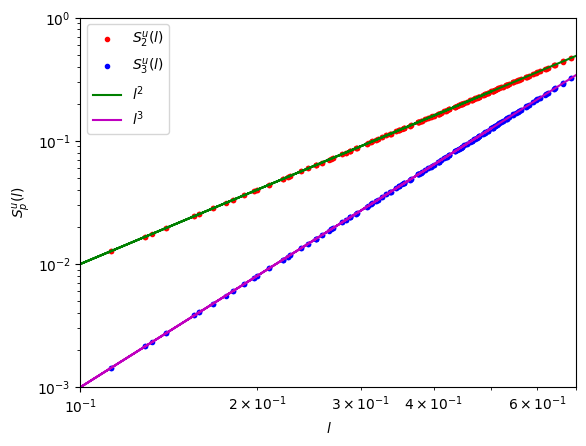

In [2]:
S2  = longitudinal_stuc[:,:,1]
S3 = longitudinal_stuc[:,:,2]

lx = l_vector[:,:,0]
ly = l_vector[:,:,1]
l = np.sqrt(lx**2 + ly**2)


# Numerically calculated structure functions
plt.loglog(l.flatten(), S2.flatten(), '.r', label=r'$S_2^{u}(l)$')
plt.loglog(l.flatten(), S3.flatten(), '.b', label=r'$S_3^{u}(l)$')

# Analytical solution
plt.loglog(l.flatten(), (l.flatten())**2, '-g', label=r'$l^2$')
plt.loglog(l.flatten(), (l.flatten())**3, '-m', label=r'$l^3$')



plt.xlim([0.1, 0.7])
plt.ylim([1e-3, 1])
plt.xlabel(r'$l$')
plt.ylabel(r'$S_p^{u}(l)$')
plt.legend()

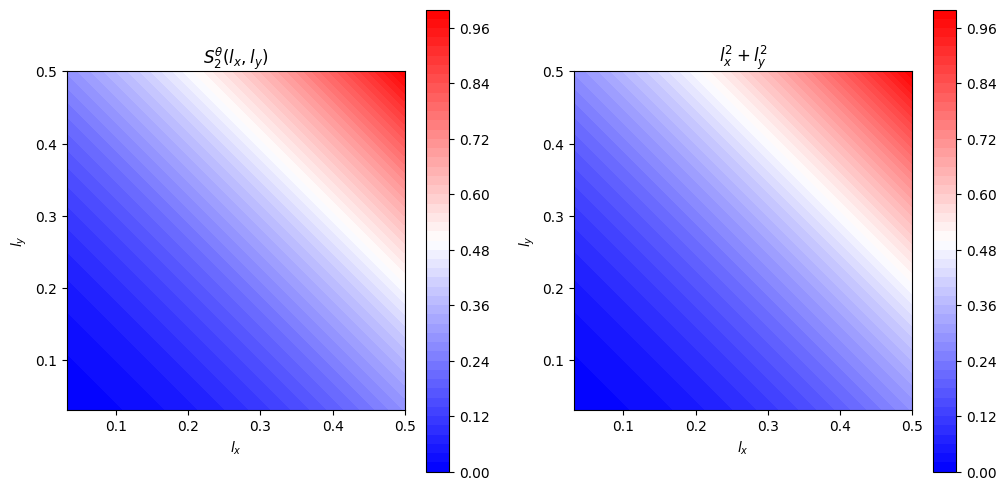

In [3]:
from py2d.spectra import spectrum_angled_average_2DFHIT

data = scalar_stuc[:,:,1]
lx = l_scalar[:,:,0]
ly = l_scalar[:,:,1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 3 columns
cmap = 'bwr'
vmax = np.max(data)
vmin = -vmax

# Plot the scalar structure function

# Numerically calculated structure function
contour1 = ax[0].contourf(lx, ly, data, cmap=cmap, levels=50, vmax=1, vmin=0)
ax[0].set_title(r'$S_2^{\theta}(l_x,l_y)$')
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$l_x$')
ax[0].set_ylabel(r'$l_y$')
plt.colorbar(contour1)

# Analytical solution
contour2 = ax[1].contourf(lx, ly, (lx + ly)**2, data, cmap=cmap, levels=50, vmax=1, vmin=0)
ax[1].set_title(r'$l_x^2 + l_y^2$')
ax[1].set_aspect('equal')
ax[1].set_xlabel(r'$l_x$')
ax[1].set_ylabel(r'$l_y$')
plt.colorbar(contour2)

plt.show()